In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

In [2]:
cd ..

/home/dhatri


In [3]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [4]:
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [11]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [12]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<Axes: xlabel='date'>

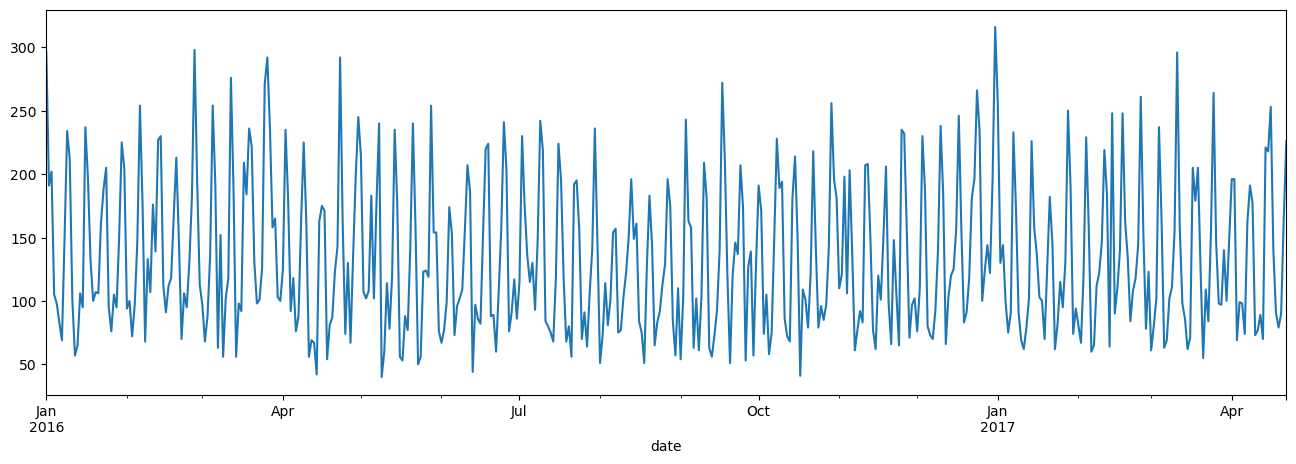

In [15]:
df1['total'].plot()

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

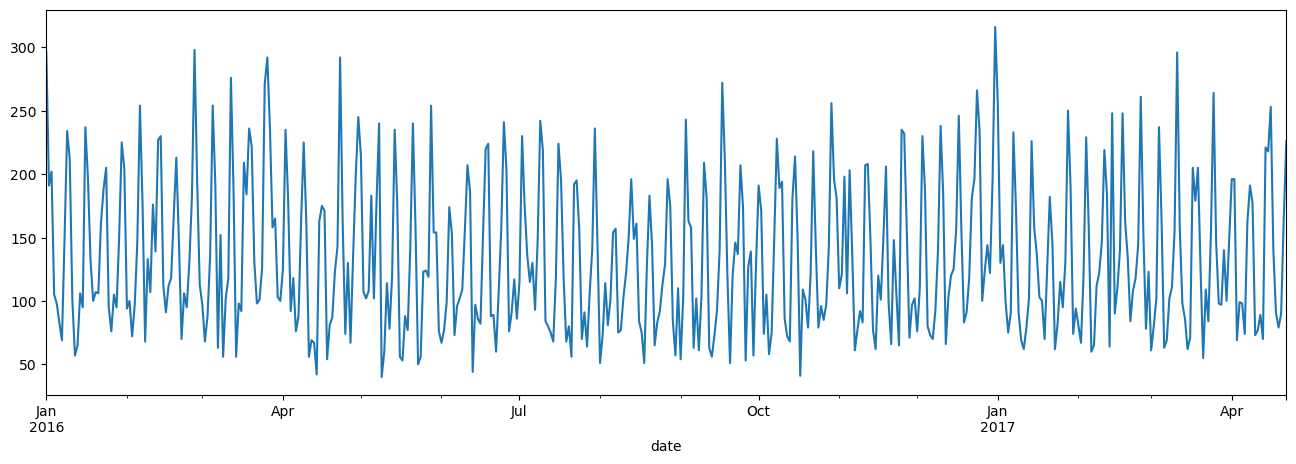

In [18]:
ax = df1['total'].plot()
df1.query('holiday==1').index

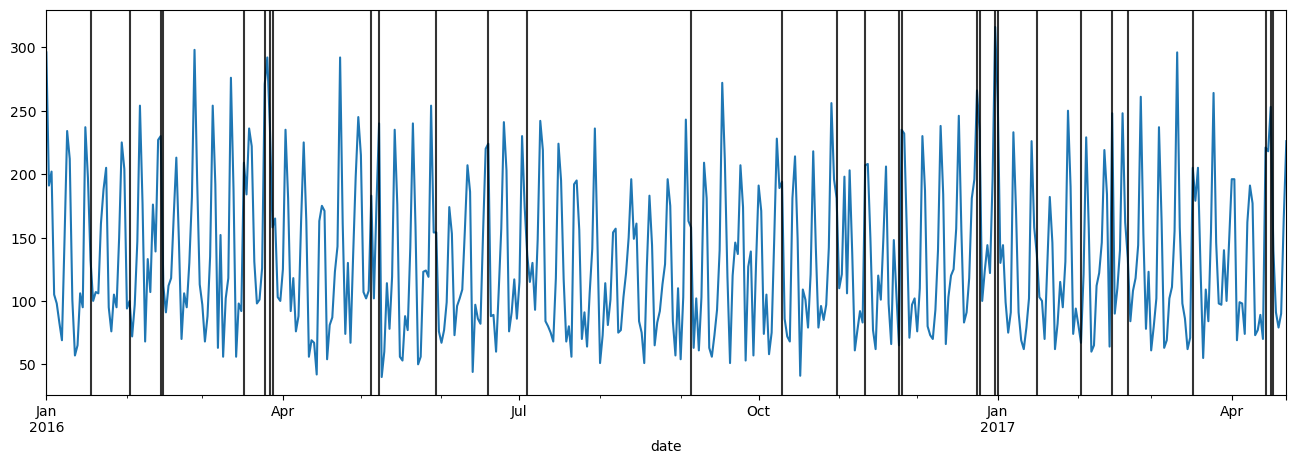

In [21]:
ax = df1['total'].plot()
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8);

<Axes: xlabel='date'>

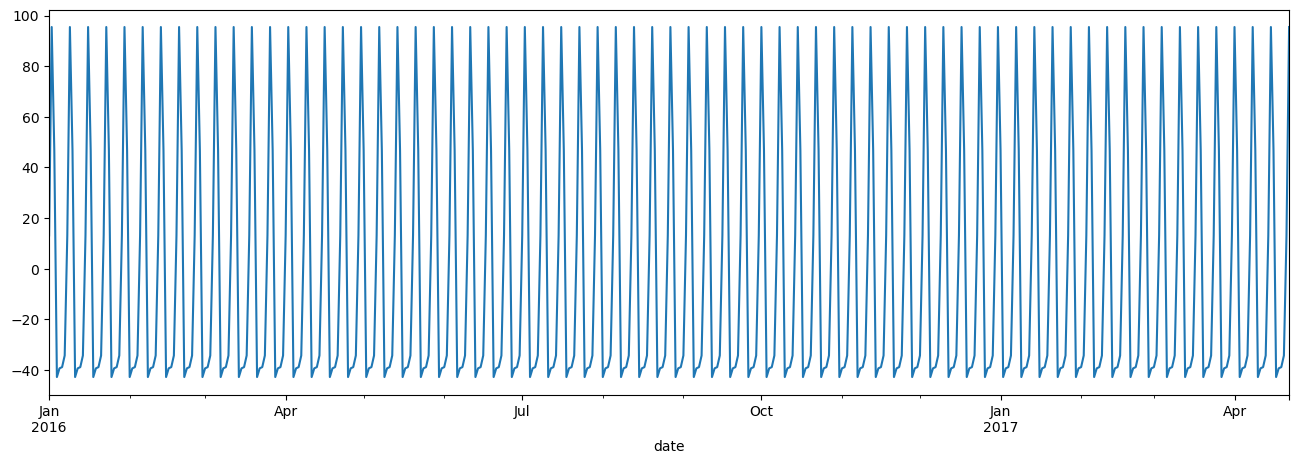

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1['total']).seasonal.plot()

In [25]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [26]:
from pmdarima import auto_arima

In [28]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2390.291
Date:                   Sun, 09 Jun 2024   AIC                           4788.581
Time:                           22:43:27   BIC                           4805.260
Sample:                       01-01-2016   HQIC                          4795.138
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4765      2.191      2.956      0.003       2.182      10.771
ar.S.L7        0.9484      0.017     56.693      0.000       0.916       0.981
ma.S.L7       -0.6961      0.058    -12.086      0.000      -0.809      -0.583
sigma2      1386.7835     92.675     14.964      0.000    1205.144    1568.424
===================================================================================
Ljung-Box (L1) (Q):                  16.17   Jarque-Bera (JB):                55.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.70
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model = SARIMAX(train['total'], order=(0, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

In [32]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12470D+00    |proj g|=  7.12107D-03

At iterate    5    f=  5.12462D+00    |proj g|=  3.43769D-03

At iterate   10    f=  5.12459D+00    |proj g|=  1.48786D-03

At iterate   15    f=  5.12456D+00    |proj g|=  1.74684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   2.198D-07   5.125D+00
  F =   5.1245573992985340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [33]:
start = len(train)
end = len(train) + len(test) - 1

In [34]:
pred = results.predict(start, end).rename('SARIMA model')

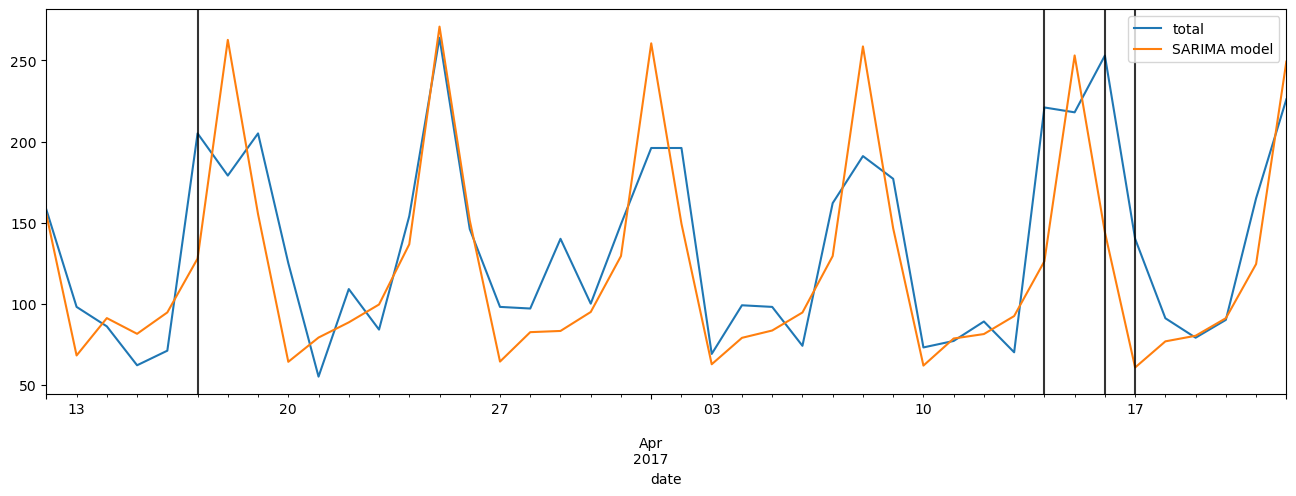

In [36]:
ax = test['total'].plot(legend=True)
pred.plot(legend=True)

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8);

In [39]:
from statsmodels.tools.eval_measures import rmse

In [40]:
rmse(test['total'], pred)

41.71682702036249

In [43]:
auto_arima(df['total'].dropna(), exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2390.291
Date:                   Sun, 09 Jun 2024   AIC                           4788.581
Time:                           23:28:34   BIC                           4805.260
Sample:                       01-01-2016   HQIC                          4795.138
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4765      2.191      2.956      0.003       2.182      10.771
ar.S.L7        0.9484      0.017     56.693      0.000       0.916       0.981
ma.S.L7       -0.6961      0.058    -12.086      0.000      -0.809      -0.583
sigma2      1386.7835     92.675     14.964      0.000    1205.144    1568.424
===================================================================================
Ljung-Box (L1) (Q):                  16.17   Jarque-Bera (JB):                55.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.70
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)

In [45]:
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52134D+00    |proj g|=  1.57319D-01

At iterate    5    f=  5.42733D+00    |proj g|=  1.25988D-02

At iterate   10    f=  5.17268D+00    |proj g|=  3.51965D-02

At iterate   15    f=  5.09863D+00    |proj g|=  3.32470D-02


 This problem is unconstrained.



At iterate   20    f=  4.81382D+00    |proj g|=  1.33951D-02

At iterate   25    f=  4.80616D+00    |proj g|=  5.69699D-04

At iterate   30    f=  4.80269D+00    |proj g|=  8.71402D-04

At iterate   35    f=  4.80214D+00    |proj g|=  1.42871D-05

At iterate   40    f=  4.80214D+00    |proj g|=  1.09450D-04

At iterate   45    f=  4.79489D+00    |proj g|=  1.73257D-03

At iterate   50    f=  4.78630D+00    |proj g|=  1.31173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87      1     0     0   1.312D-02   4.786D+00
  F =   4.7862994012147295     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2086.827
Date:                           Sun, 09 Jun 2024   AIC                           4185.653
Time:                                   23:30:46   BIC                           4210.119
Sample:                               01-01-2016   HQIC                          4195.308
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.6563      3.709     18.243      0.000      60.388      74.925
ar.L1          0.8625      0.070     12.293      0.000       0.725       1.000
ma.L1         -0.7386      0.096     -7.693      0.000      -0.927      -0.550
ar.S.L7        0.9999      0.000   6554.266      0.000       1.000       1.000
ma.S.L7       -0.9614      0.024    -39.650      0.000      -1.009      -0.914
sigma2       768.9969     44.483     17.287      0.000     681.812     856.182
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):                17.04
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.20
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
start = len(train)
end = len(train) + len(test) - 1

In [49]:
pred = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX')

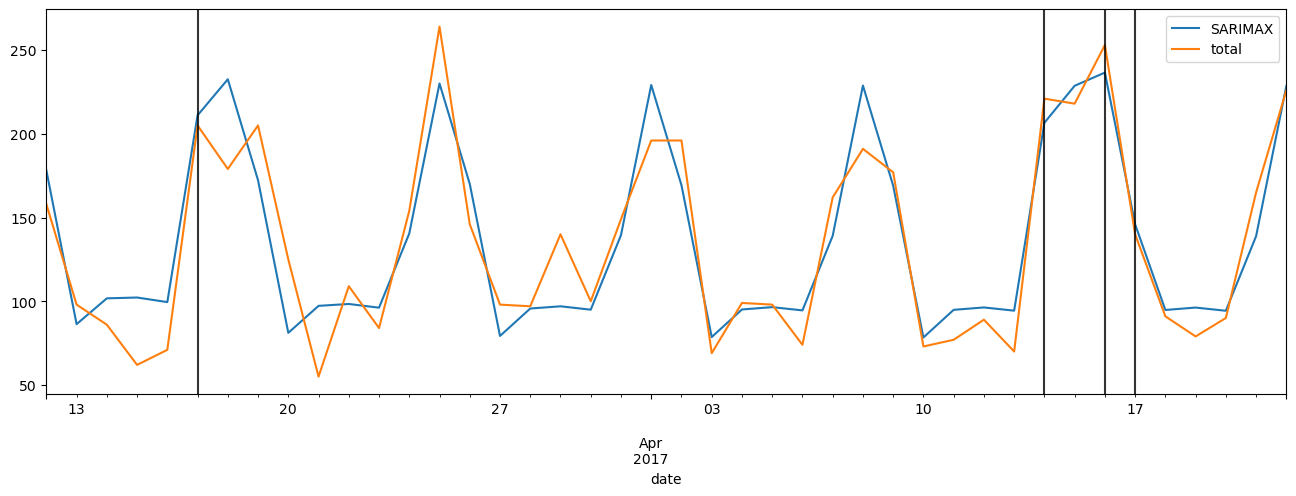

In [51]:
ax = pred.plot(legend=True)
test['total'].plot(legend=True)

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8);

In [52]:
error = rmse(test['total'], pred)

In [53]:
error

23.10162477788687

In [54]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)

In [55]:
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51504D+00    |proj g|=  1.65208D-01

At iterate    5    f=  5.44060D+00    |proj g|=  9.00690D-02

At iterate   10    f=  5.42120D+00    |proj g|=  1.55814D-01


 This problem is unconstrained.



At iterate   15    f=  5.17412D+00    |proj g|=  8.20877D-02

At iterate   20    f=  5.17357D+00    |proj g|=  7.93159D-03

At iterate   25    f=  5.17115D+00    |proj g|=  1.37310D-01

At iterate   30    f=  4.87878D+00    |proj g|=  4.32853D-01

At iterate   35    f=  4.79713D+00    |proj g|=  3.22063D-01

At iterate   40    f=  4.78622D+00    |proj g|=  1.24643D-01

At iterate   45    f=  4.78315D+00    |proj g|=  4.83555D-01
  ys=-3.589E-03  -gs= 1.701E-04 BFGS update SKIPPED

At iterate   50    f=  4.78269D+00    |proj g|=  1.28902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     96      1     1

In [56]:
exog_fcast = df[478:][['holiday']]

In [64]:
fcast = results.predict(len(df1), len(df1) + 38, exog=exog_fcast).rename('FINAL')

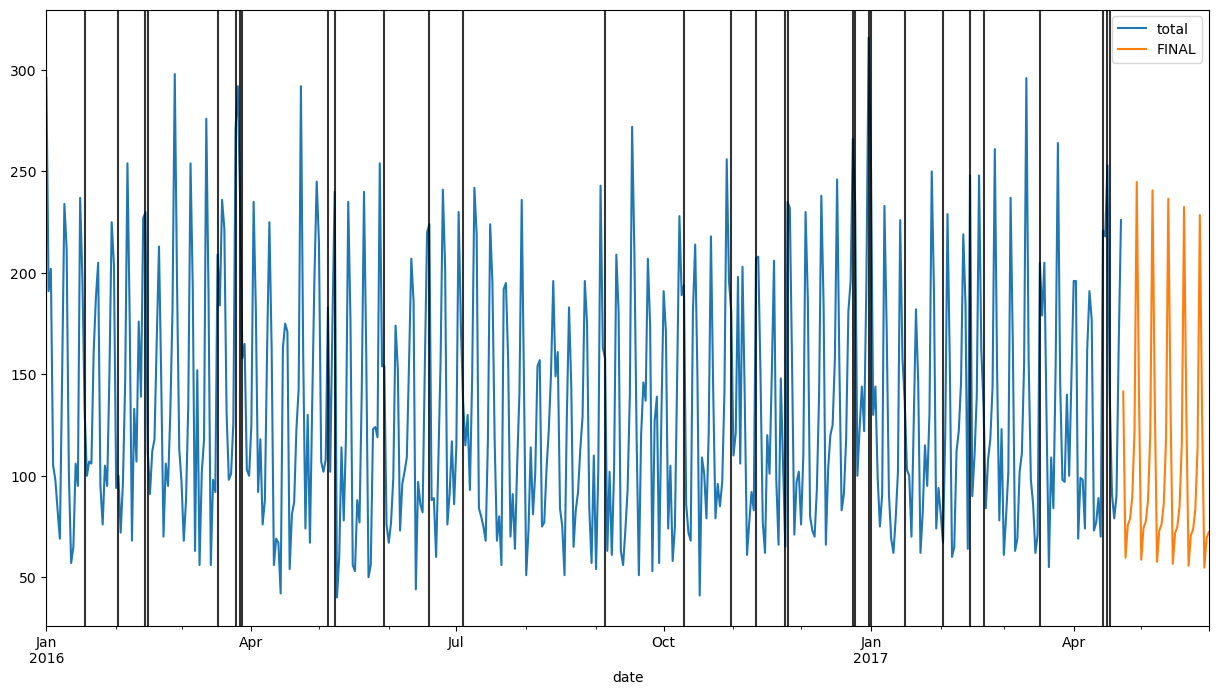

In [65]:
ax = df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8);